In [26]:
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC
import seaborn as sns
import csv

In [27]:
iris = pd.read_csv("penguins_train.csv")
# ? Feature Engineering part
iris = iris.drop('Island', axis=1)
iris = iris.drop('Clutch Completion', axis=1)
# ? We do this because we have seen that there are values of "." in "Sex".
iris.drop(iris[(iris['Sex'] != "MALE") & (iris['Sex'] != "FEMALE")].index, inplace = True)
# ? Tuples with NULL values are dropped
iris = iris.dropna()

In [28]:
# ? We are changing the binary values into 1s and 0s for future ease in computation
iris.loc[iris['Sex'].eq('FEMALE'), 'Sex'] = '1'
iris.loc[iris['Sex'].eq('MALE'), 'Sex'] = '0'

In [29]:
# ? Normalizing values of the six numerical fields for future ease in computation
iris['Culmen Length (mm)'] = (iris['Culmen Length (mm)']  - iris['Culmen Length (mm)'].min()) / (iris['Culmen Length (mm)'].max() - iris['Culmen Length (mm)'].min())
iris['Culmen Depth (mm)'] = (iris['Culmen Depth (mm)']  - iris['Culmen Depth (mm)'].min()) / (iris['Culmen Depth (mm)'].max() - iris['Culmen Depth (mm)'].min())
iris['Flipper Length (mm)'] = (iris['Flipper Length (mm)']  - iris['Flipper Length (mm)'].min()) / (iris['Flipper Length (mm)'].max() - iris['Flipper Length (mm)'].min())
iris['Body Mass (g)'] = (iris['Body Mass (g)']  - iris['Body Mass (g)'].min()) / (iris['Body Mass (g)'].max() - iris['Body Mass (g)'].min())
iris['Delta 15 N (o/oo)'] = (iris['Delta 15 N (o/oo)']  - iris['Delta 15 N (o/oo)'].min()) / (iris['Delta 15 N (o/oo)'].max() - iris['Delta 15 N (o/oo)'].min())
iris['Delta 13 C (o/oo)'] = (iris['Delta 13 C (o/oo)']  - iris['Delta 13 C (o/oo)'].min()) / (iris['Delta 13 C (o/oo)'].max() - iris['Delta 13 C (o/oo)'].min())

In [30]:
# ? We take the x values for the classification and the y value as the class
x = iris.iloc[:, :7].values
y = iris['Species'].values

In [31]:
# ? We split the data into training and test set in 4:1 ratio.
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

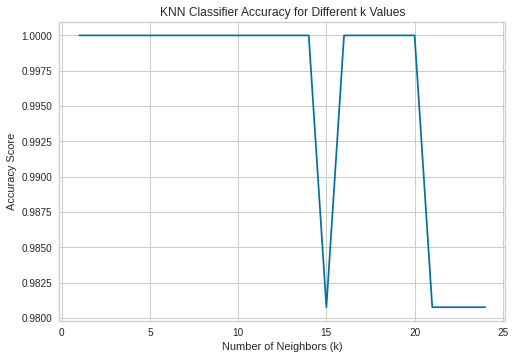

In [32]:
# Running KNN on the original dataset with different number of neighbors
xaxis = []
clfScores = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    clfScores.append(knn.score(x_test, y_test))
    xaxis.append(i)

plt.plot(xaxis, clfScores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.show()


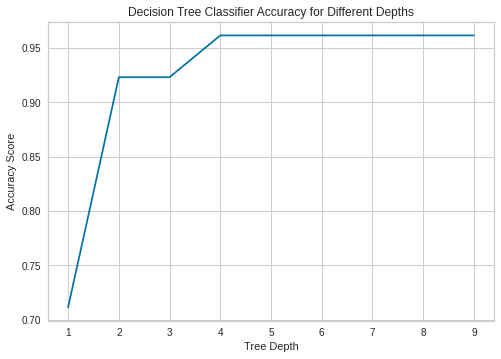

In [33]:
# Running Decision Tree Classifier on the dataset with different depths
xaxis = []
clfScores = []
for i in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(x_train, y_train)
    clfScores.append(clf.score(x_test, y_test))
    xaxis.append(i)

plt.plot(xaxis, clfScores)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Classifier Accuracy for Different Depths')
plt.show()


In [34]:
# ? Running Naive Bayes on the original dataset
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_test, y_test))

0.9807692307692307


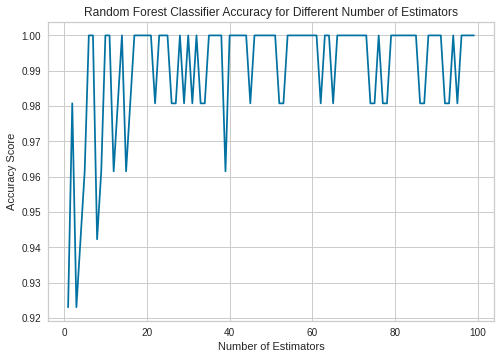

In [35]:
# Running Random Forest Classifier on the dataset with different number of estimators
xaxis = []
clfScores = []
for i in range(1, 100):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    clfScores.append(clf.score(x_test, y_test))
    xaxis.append(i)

plt.plot(xaxis, clfScores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Accuracy for Different Number of Estimators')
plt.show()


In [36]:
# ? Running SVM with the kernels linear, polynomial, sigmoid, and rbf on the same dataset, and check their
# ? respective accuracies.
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='poly')
clf3 = SVC(kernel='sigmoid')
clf4 = SVC(kernel='rbf')
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
print(clf1.score(x_test, y_test), clf2.score(x_test, y_test), clf3.score(x_test, y_test), clf4.score(x_test, y_test))
# ! Precomputed could not be run since it is not a nxn matrix.

1.0 1.0 0.5576923076923077 1.0


In [37]:
irisNotGentoo = iris.copy()
irisNotChinstrap = iris.copy()
irisNotAdelie = iris.copy()
irisNotGentoo.drop(irisNotGentoo[irisNotGentoo['Species'] == "Gentoo penguin (Pygoscelis papua)"].index, inplace = True)
irisNotChinstrap.drop(irisNotChinstrap[irisNotChinstrap['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"].index, inplace = True)
irisNotAdelie.drop(irisNotAdelie[irisNotAdelie['Species'] == "Adelie Penguin (Pygoscelis adeliae)"].index, inplace = True)

In [38]:
xNotGentoo = irisNotGentoo.iloc[:, :7].values
xNotChinstrap = irisNotChinstrap.iloc[:, :7].values
xNotAdelie = irisNotAdelie.iloc[:, :7].values
yNotGentoo = irisNotGentoo['Species'].values
yNotChinstrap = irisNotChinstrap['Species'].values
yNotAdelie = irisNotAdelie['Species'].values

In [39]:
knnNotGentoo = KNeighborsClassifier(n_neighbors=7)
knnNotGentoo.fit(xNotGentoo, yNotGentoo)
knnNotChinstrap = KNeighborsClassifier(n_neighbors=7)
knnNotChinstrap.fit(xNotChinstrap, yNotChinstrap)
knnNotAdelie = KNeighborsClassifier(n_neighbors=5)
knnNotAdelie.fit(xNotAdelie, yNotAdelie)


KNeighborsClassifier()

In [40]:
X_test = []
for i in x_test:
    i = list(i)
    i[4] = int(i[4])
    X_test.append(i)

In [41]:
predicted = []
chinstrapCountTotal = 0
gentooCountTotal = 0
adelieCountTotal = 0

In [42]:
for i in range(len(X_test)):
    
    chinstrapCount = 0
    gentooCount = 0
    adelieCount = 0
    
    varNotChinstrap = knnNotChinstrap.predict([X_test[i]])
    if varNotChinstrap[0] == 'Gentoo penguin (Pygoscelis papua)':
        gentooCount += 1
    elif varNotChinstrap[0] == 'Adelie Penguin (Pygoscelis adeliae)':
        adelieCount += 1
    
    varNotAdelie = knnNotAdelie.predict([X_test[i]])
    if varNotAdelie[0] == 'Gentoo penguin (Pygoscelis papua)':
        gentooCount += 1
    elif varNotAdelie[0] == 'Chinstrap penguin (Pygoscelis antarctica)':
        chinstrapCount += 1
        
    varNotGentoo = knnNotGentoo.predict([X_test[i]])
    if varNotGentoo[0] == 'Chinstrap penguin (Pygoscelis antarctica)':
        chinstrapCount += 1
    elif varNotGentoo[0] == 'Adelie Penguin (Pygoscelis adeliae)':
        adelieCount += 1

    chinstrapCountTotal += chinstrapCount
    gentooCountTotal += gentooCount
    adelieCountTotal += adelieCount
        
    if adelieCount == 2:
        predicted.append('Adelie Penguin (Pygoscelis adeliae)')
    elif chinstrapCount == 2:
        predicted.append('Chinstrap penguin (Pygoscelis antarctica)')
    elif gentooCount == 2:
        predicted.append('Gentoo penguin (Pygoscelis papua)')
    else:
        predicted.append('Emperor penguin (Aptenodytes forsteri)')

In [43]:
# ? F1 Score
print(metrics.f1_score(y_test, predicted, average=None))
print(metrics.f1_score(y_test, predicted, average='micro'))
print(metrics.f1_score(y_test, predicted, average='macro'))
print(metrics.f1_score(y_test, predicted, average='weighted'))

[1. 1. 1.]
1.0
1.0
1.0


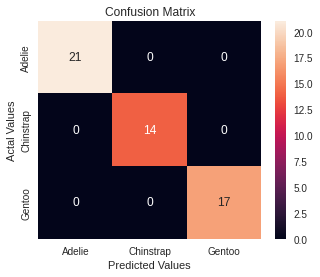

In [44]:
# ? Plotting the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['Adelie','Chinstrap','Gentoo'], 
                     columns = ['Adelie','Chinstrap','Gentoo'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()